In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error, r2_score, make_scorer, accuracy_score, log_loss, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,  BatchNormalization,LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Regression - All Games with Ratings

In [2]:
df_reg = pd.read_csv('../data/preprocessed_games_with_rating_reg.csv')
print(df_reg.shape)
df_reg

(17225, 302)


,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,way,weapon,whole,work,world,www,year,young,zombie,success
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077217,0.000000,...,0.000000,0.000000,0.0,0.000000,0.159854,0.0,0.000000,0.0,0.0,3.365706
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170055,...,0.000000,0.000000,0.0,0.147969,0.335459,0.0,0.000000,0.0,0.0,3.534269
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042543,0.000000,...,0.056385,0.063615,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.423796
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.000000,...,0.000000,0.313342,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.234114
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333835,...,0.000000,0.095134,0.0,0.000000,0.065854,0.0,0.000000,0.0,0.0,2.744355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.172980
17221,311674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070975,0.000000,...,0.000000,0.000000,0.0,0.000000,0.073466,0.0,0.000000,0.0,0.0,-1.374671
17222,290056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070597,0.000000,...,0.093567,0.000000,0.0,0.000000,0.073074,0.0,0.000000,0.0,0.0,-1.374671
17223,268298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.173640,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.226400


In [3]:
df_reg.describe()

,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,way,weapon,whole,work,world,www,year,young,zombie,success
count,1.722500e+04,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,...,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,17225.000000,1.722500e+04
mean,1.321518e+05,0.023548,0.009315,0.020993,0.010572,0.015243,0.008524,0.010842,0.035453,0.035401,...,0.032200,0.030712,0.008161,0.008532,0.060226,0.008287,0.018502,0.009587,0.008416,-1.452023e-16
std,2.338804e+05,0.054914,0.039767,0.057096,0.043032,0.046096,0.046155,0.048747,0.043636,0.069592,...,0.064211,0.074040,0.039151,0.042916,0.089478,0.045501,0.059932,0.047310,0.062893,1.000029e+00
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.374671e+00
25%,1.340700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.374671e+00
50%,2.136200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.157801e-01
75%,6.056700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067724,0.058962,...,0.050460,0.000000,0.000000,0.000000,0.098377,0.000000,0.000000,0.000000,0.000000,6.489625e-01
max,1.003458e+06,0.624515,0.531832,0.626586,0.718150,0.577418,0.702678,0.813094,0.383570,1.000000,...,0.585579,0.774814,0.642774,1.000000,0.683843,0.570783,0.686941,0.705424,0.931328,3.534269e+00


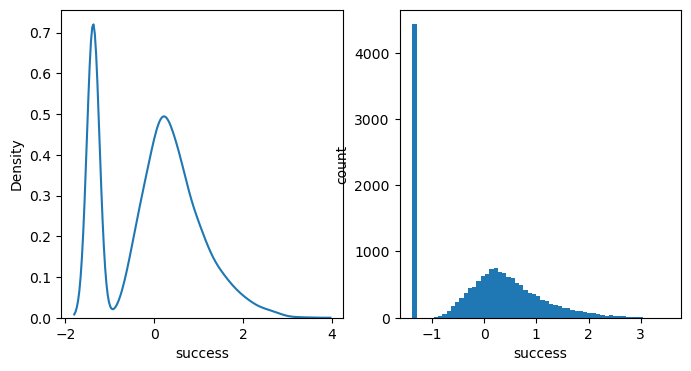

In [4]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df_reg['success'])
plt.xlabel('success')
plt.subplot(1,2,2)
plt.hist(df_reg['success'], bins=60)
plt.xlabel('success')
plt.ylabel('count')
plt.show()

In [5]:
X = df_reg.iloc[:,1:-1]
y = df_reg.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len}')

Train size: 13780
Validation size: 1722
Test size: <built-in function len>


In [6]:
# Ridge Linear Regression

rlr_model = Ridge(alpha=1.0)

rlr_model.fit(X_train, y_train)

y_pred = rlr_model.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.8262
R²: 0.3067


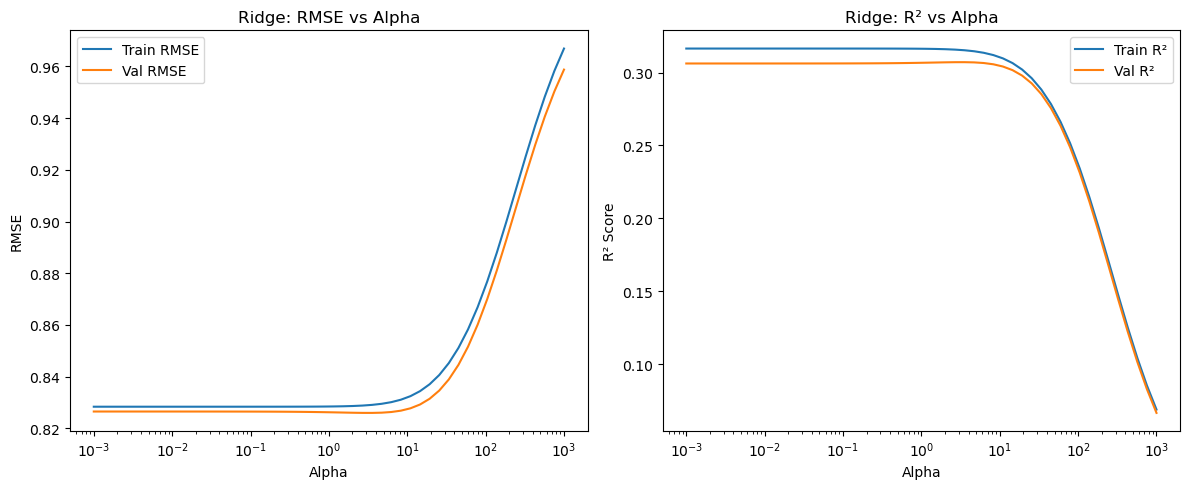

In [7]:
alpha_list = []
rmse_train_list = []
rmse_val_list = []
r2_train_list = []
r2_val_list = []

for alpha in np.logspace(-3, 3, 50):
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_val = root_mean_squared_error(y_val, y_val_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)

    alpha_list.append(alpha)
    rmse_train_list.append(rmse_train)
    rmse_val_list.append(rmse_val)
    r2_train_list.append(r2_train)
    r2_val_list.append(r2_val)

plt.figure(figsize=(12, 5))

# RMSE Plot
plt.subplot(1, 2, 1)
plt.plot(alpha_list, rmse_train_list, label="Train RMSE")
plt.plot(alpha_list, rmse_val_list, label="Val RMSE")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("Ridge: RMSE vs Alpha")
plt.legend()

# R² Plot
plt.subplot(1, 2, 2)
plt.plot(alpha_list, r2_train_list, label="Train R²")
plt.plot(alpha_list, r2_val_list, label="Val R²")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Ridge: R² vs Alpha")
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
optimal_alpha = (
    alpha_list[rmse_val_list.index(min(rmse_val_list))] +
    alpha_list[r2_val_list.index(max(r2_val_list))]
)/2

rlr_model_2 = Ridge(alpha=optimal_alpha)

rlr_model_2.fit(X_train, y_train)

y_pred = rlr_model_2.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Optimal RMSE: {rmse:.4f}')
print(f'Optimal R²: {r2:.4f}')


Optimal RMSE: 0.8260
Optimal R²: 0.3071


[0]	validation_0-rmse:0.99235	validation_1-rmse:0.98492
[1]	validation_0-rmse:0.98217	validation_1-rmse:0.97536
[2]	validation_0-rmse:0.97314	validation_1-rmse:0.96661
[3]	validation_0-rmse:0.96476	validation_1-rmse:0.95967
[4]	validation_0-rmse:0.95694	validation_1-rmse:0.95279
[5]	validation_0-rmse:0.94947	validation_1-rmse:0.94595
[6]	validation_0-rmse:0.94238	validation_1-rmse:0.93991
[7]	validation_0-rmse:0.93525	validation_1-rmse:0.93427
[8]	validation_0-rmse:0.92897	validation_1-rmse:0.92942
[9]	validation_0-rmse:0.92311	validation_1-rmse:0.92505
[10]	validation_0-rmse:0.91735	validation_1-rmse:0.92110
[11]	validation_0-rmse:0.91189	validation_1-rmse:0.91682
[12]	validation_0-rmse:0.90641	validation_1-rmse:0.91270
[13]	validation_0-rmse:0.90171	validation_1-rmse:0.90938
[14]	validation_0-rmse:0.89700	validation_1-rmse:0.90630
[15]	validation_0-rmse:0.89269	validation_1-rmse:0.90287
[16]	validation_0-rmse:0.88816	validation_1-rmse:0.89917
[17]	validation_0-rmse:0.88333	validation

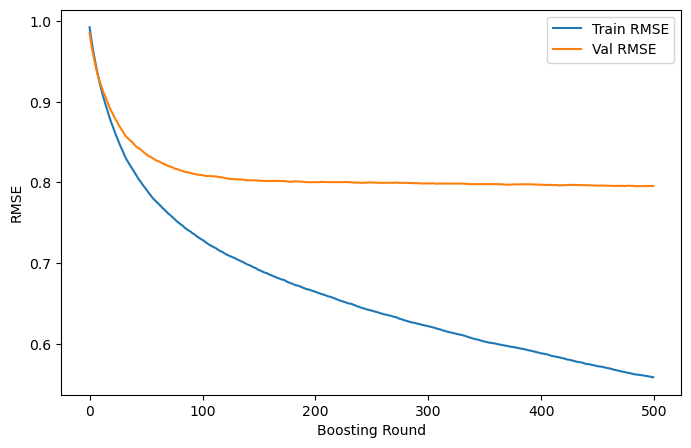

Starts overfitting at RMSE 0.9290


In [9]:
# XGB Regression

xgbr_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    eval_metric='rmse',
    random_state=0
)

xgbr_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

In [10]:
rmse_scorer = make_scorer(lambda y_true, y_pred: -root_mean_squared_error(y_true, y_pred))

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2, 2.5, 3]
}

xgbr = XGBRegressor(random_state=0)

random_search = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=param_dist,
    n_iter=30,
    scoring=rmse_scorer,
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=0
)

random_search.fit(X_train, y_train)

print(f'Best parameters: {random_search.best_params_}')

best_model = random_search.best_estimator_

y_pred = best_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
print(f'Validation RMSE: {rmse_val:.4f}')

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'subsample': 0.9, 'reg_lambda': 2.5, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
Validation RMSE: 0.7958


[0]	validation_0-rmse:0.99419	validation_1-rmse:0.98656
[1]	validation_0-rmse:0.98631	validation_1-rmse:0.98026
[2]	validation_0-rmse:0.97887	validation_1-rmse:0.97408
[3]	validation_0-rmse:0.97184	validation_1-rmse:0.96875
[4]	validation_0-rmse:0.96527	validation_1-rmse:0.96350
[5]	validation_0-rmse:0.95865	validation_1-rmse:0.95837
[6]	validation_0-rmse:0.95229	validation_1-rmse:0.95343
[7]	validation_0-rmse:0.94625	validation_1-rmse:0.94910
[8]	validation_0-rmse:0.94037	validation_1-rmse:0.94447
[9]	validation_0-rmse:0.93468	validation_1-rmse:0.94041
[10]	validation_0-rmse:0.92928	validation_1-rmse:0.93654
[11]	validation_0-rmse:0.92388	validation_1-rmse:0.93290
[12]	validation_0-rmse:0.91836	validation_1-rmse:0.92874
[13]	validation_0-rmse:0.91341	validation_1-rmse:0.92493
[14]	validation_0-rmse:0.90828	validation_1-rmse:0.92113
[15]	validation_0-rmse:0.90341	validation_1-rmse:0.91791
[16]	validation_0-rmse:0.89845	validation_1-rmse:0.91475
[17]	validation_0-rmse:0.89376	validation

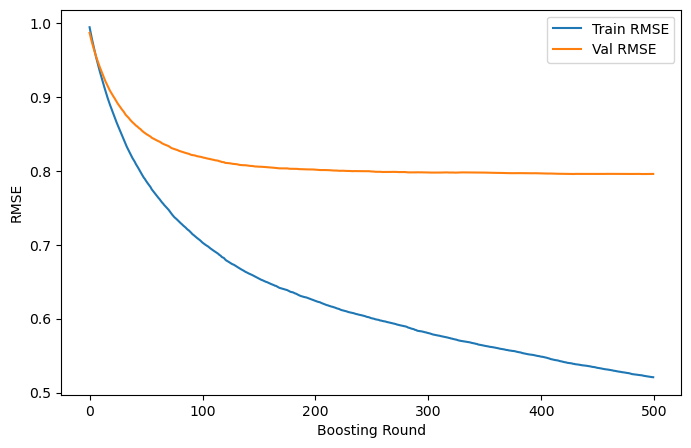

Starts overfitting at RMSE 0.9523


In [11]:
xgbr_model_2 = XGBRegressor(
    **random_search.best_params_,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_2.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_2.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_2.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

[0]	validation_0-rmse:0.99512	validation_1-rmse:0.98618
[1]	validation_0-rmse:0.98827	validation_1-rmse:0.97952
[2]	validation_0-rmse:0.98228	validation_1-rmse:0.97436
[3]	validation_0-rmse:0.97620	validation_1-rmse:0.96850
[4]	validation_0-rmse:0.97071	validation_1-rmse:0.96343
[5]	validation_0-rmse:0.96573	validation_1-rmse:0.95878
[6]	validation_0-rmse:0.96046	validation_1-rmse:0.95393
[7]	validation_0-rmse:0.95564	validation_1-rmse:0.94984
[8]	validation_0-rmse:0.95091	validation_1-rmse:0.94566
[9]	validation_0-rmse:0.94655	validation_1-rmse:0.94237
[10]	validation_0-rmse:0.94257	validation_1-rmse:0.93875
[11]	validation_0-rmse:0.93857	validation_1-rmse:0.93490
[12]	validation_0-rmse:0.93477	validation_1-rmse:0.93191
[13]	validation_0-rmse:0.93114	validation_1-rmse:0.92867
[14]	validation_0-rmse:0.92786	validation_1-rmse:0.92598
[15]	validation_0-rmse:0.92404	validation_1-rmse:0.92216
[16]	validation_0-rmse:0.92030	validation_1-rmse:0.91844
[17]	validation_0-rmse:0.91699	validation

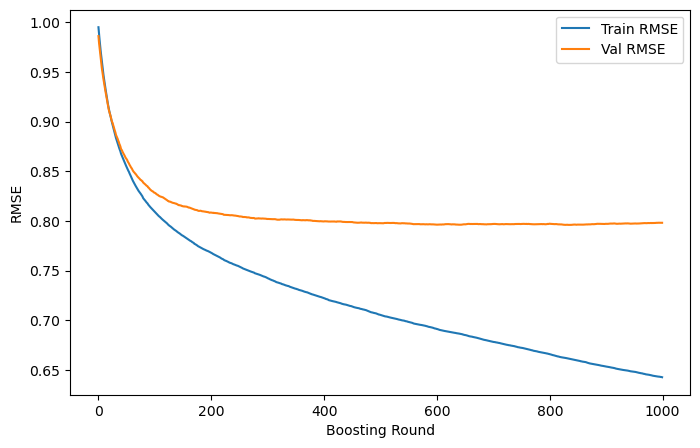

Starts overfitting at RMSE 0.9064


In [12]:
trial_params = {
    'max_depth': 4,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 2,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'learning_rate': 0.05,
    'n_estimators': 1000
}


xgbr_model_3 = XGBRegressor(
    **trial_params,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_3.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_3.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_3.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8647 - mae: 0.7627 - val_loss: 0.6787 - val_mae: 0.6830
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.6839 - mae: 0.6808 - val_loss: 0.6590 - val_mae: 0.6614
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 0.6489 - mae: 0.6580 - val_loss: 0.6543 - val_mae: 0.6584
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - loss: 0.6017 - mae: 0.6313 - val_loss: 0.6534 - val_mae: 0.6558
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.5524 - mae: 0.6018 - val_loss: 0.6576 - val_mae: 0.6596
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.5079 - mae: 0.5748 - val_loss: 0.6592 - val_mae: 0.6556
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 0.4700 - mae: 0.5562 - val_loss: 0.6736 - val_mae: 0.6616
Epoch 8/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.4268 - mae: 0.5243 - val_loss: 0.6749 - val_mae: 0.6633
Epoch 9/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 86

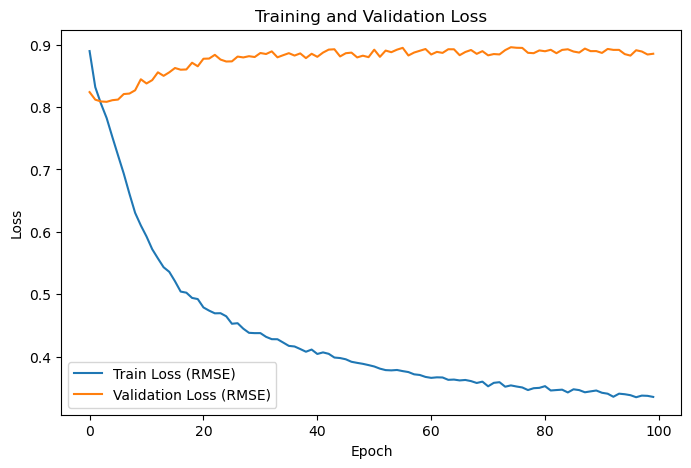

In [13]:
# Neural Network Regression

nnr_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

nnr_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = nnr_model.fit(
    X_train, y_train,
    validation_data = (X_val, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)

y_pred = nnr_model.predict(X_val).flatten()

rmse_val = np.sqrt(root_mean_squared_error(y_val, y_pred))
r2_val = r2_score(y_val, y_pred)

print(f'Validation RMSE: {rmse_val:.4f}')
print(f'Validation R²: {r2_val:.4f}')

plt.figure(figsize=(8,5))
plt.plot(np.sqrt(history.history['loss']), label='Train Loss (RMSE)')
plt.plot(np.sqrt(history.history['val_loss']), label='Validation Loss (RMSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 73046
[LightGBM] [Info] Number of data points in the train set: 13780, number of used features: 300
[LightGBM] [Info] Start training from score 0.001385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

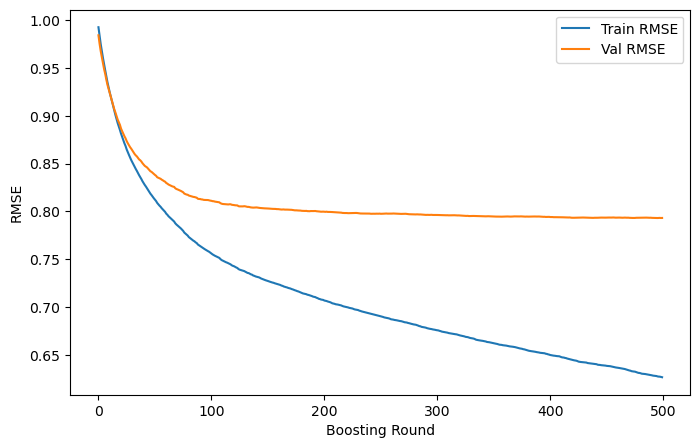

Starts overfitting at RMSE 0.9148 on iteration 13


In [14]:
# Light GBM Regression

lgbmr_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=0
)

lgbmr_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    eval_metric='rmse',
)

y_pred = lgbmr_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'Validation R2: {r2_val:.4f}')

evals_result = lgbmr_model.evals_result_

plt.figure(figsize=(8, 5))
plt.plot(evals_result['training']['rmse'], label='Train RMSE')
plt.plot(evals_result['valid_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

train_rmse = evals_result['training']['rmse']
val_rmse = evals_result['valid_1']['rmse']

for i in range(len(train_rmse)):
    if train_rmse[i] < val_rmse[i]:
        print(f'Starts overfitting at RMSE {train_rmse[i]:.4f} on iteration {i+1}')
        break

All models so far have to high an RMSE. Let's quickly try to restrict the data set to a more normal distribution (by removing zero ratings). This is a compromise, since we ommit some useful signal by removing this data.

# Regression - All Games with Non-Zero Ratings

In [15]:
df_reg = pd.read_csv('../data/preprocessed_games_pos_rating_reg.csv')
print(df_reg.shape)
df_reg

(12797, 302)


,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,war,way,weapon,whole,world,www,year,young,zombie,success
0,3498,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.073375,0.000000,...,0.000000,0.000000,0.000000,0.0,0.149395,0.0,0.000000,0.0,0.0,4.234134
1,3328,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.171782,...,0.000000,0.000000,0.000000,0.0,0.342679,0.0,0.000000,0.0,0.0,4.481091
2,4200,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.042788,0.000000,...,0.000000,0.057324,0.063300,0.0,0.000000,0.0,0.000000,0.0,0.0,4.319240
3,4291,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.070994,0.000000,...,0.135222,0.000000,0.315079,0.0,0.000000,0.0,0.000000,0.0,0.0,2.576266
4,5286,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.301208,...,0.000000,0.000000,0.087317,0.0,0.060087,0.0,0.000000,0.0,0.0,3.323807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12792,337607,0.25141,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.296727,0.0,0.0,0.072185
12793,326782,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.077143,0.0,0.000000,0.0,0.0,-0.314040
12794,320395,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,-0.443451
12795,268298,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.168323,0.0,0.000000,0.0,0.000000,0.0,0.0,-0.365188


In [16]:
df_reg.describe()

,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,war,way,weapon,whole,world,www,year,young,zombie,success
count,1.279700e+04,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,...,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,12797.000000,1.279700e+04
mean,1.310125e+05,0.023961,0.009784,0.021084,0.009883,0.014197,0.008998,0.009674,0.034924,0.037178,...,0.017582,0.031348,0.030771,0.007888,0.061234,0.009204,0.019119,0.009655,0.008119,3.198192e-16
std,2.304513e+05,0.055242,0.041204,0.056538,0.042066,0.044754,0.044219,0.046189,0.042619,0.070338,...,0.064210,0.063204,0.072732,0.037593,0.089299,0.046550,0.061263,0.047389,0.062010,1.000039e+00
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.198919e+00
25%,1.197200e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.036577e-01
50%,2.131400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.609381e-01
75%,5.988300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067271,0.067162,...,0.000000,0.043113,0.000000,0.000000,0.099373,0.000000,0.000000,0.000000,0.000000,5.493027e-01
max,1.003458e+06,0.615472,0.532288,0.623069,0.738855,0.583650,0.690917,0.820362,0.350375,1.000000,...,0.864619,0.580863,0.771165,0.529528,0.677471,0.553954,0.720815,0.702550,0.933183,4.481091e+00


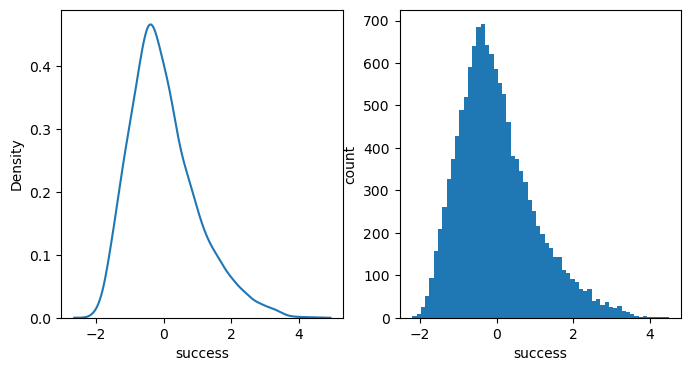

In [17]:
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(df_reg['success'])
plt.xlabel('success')
plt.subplot(1,2,2)
plt.hist(df_reg['success'], bins=60)
plt.xlabel('success')
plt.ylabel('count')
plt.show()

In [18]:
X = df_reg.iloc[:,1:-1]
y = df_reg.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len}')

Train size: 10237
Validation size: 1280
Test size: <built-in function len>


In [19]:
rlr_model_3 = Ridge(alpha=1.0)

rlr_model_3.fit(X_train, y_train)

y_pred = rlr_model_3.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.8441
R²: 0.2465


Not much of an improvement on the results using the previous dataset. Let's try our best model from last time to compare.

[0]	validation_0-rmse:0.99953	validation_1-rmse:0.96516
[1]	validation_0-rmse:0.99129	validation_1-rmse:0.95775
[2]	validation_0-rmse:0.98395	validation_1-rmse:0.95068
[3]	validation_0-rmse:0.97699	validation_1-rmse:0.94405
[4]	validation_0-rmse:0.97023	validation_1-rmse:0.93730
[5]	validation_0-rmse:0.96318	validation_1-rmse:0.93123
[6]	validation_0-rmse:0.95701	validation_1-rmse:0.92553
[7]	validation_0-rmse:0.95138	validation_1-rmse:0.92036
[8]	validation_0-rmse:0.94621	validation_1-rmse:0.91625
[9]	validation_0-rmse:0.94120	validation_1-rmse:0.91251
[10]	validation_0-rmse:0.93647	validation_1-rmse:0.90838
[11]	validation_0-rmse:0.93135	validation_1-rmse:0.90480
[12]	validation_0-rmse:0.92717	validation_1-rmse:0.90101
[13]	validation_0-rmse:0.92294	validation_1-rmse:0.89823
[14]	validation_0-rmse:0.91893	validation_1-rmse:0.89520
[15]	validation_0-rmse:0.91461	validation_1-rmse:0.89197
[16]	validation_0-rmse:0.91024	validation_1-rmse:0.88871
[17]	validation_0-rmse:0.90702	validation

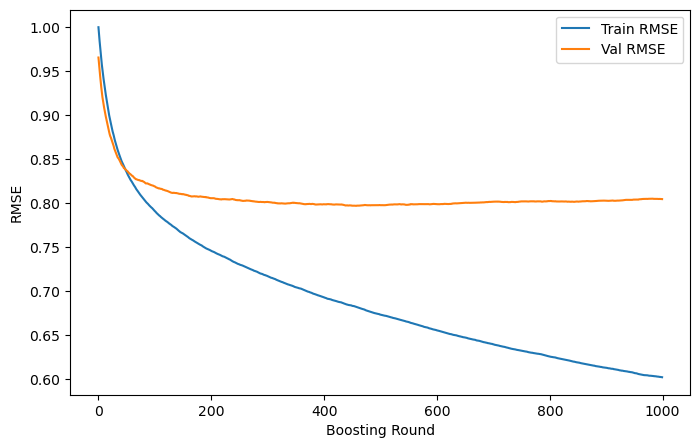

Starts overfitting at RMSE 0.8377


In [20]:
trial_params = {
    'max_depth': 4,
    'min_child_weight': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'gamma': 2,
    'reg_alpha': 0.1,
    'reg_lambda': 1,
    'learning_rate': 0.05,
    'n_estimators': 1000
}


xgbr_model_4 = XGBRegressor(
    **trial_params,
    eval_metric='rmse',
    random_state=0
)

xgbr_model_4.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],
    verbose=True
)

y_pred = xgbr_model_4.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

print(f'\nValidation RMSE: {rmse_val:.4f}')
print(f'\nValidation R2: {r2_val:.4f}')

evals_result = xgbr_model_4.evals_result()

plt.figure(figsize=(8, 5))
plt.plot(evals_result['validation_0']['rmse'], label='Train RMSE')
plt.plot(evals_result['validation_1']['rmse'], label='Val RMSE')
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.legend()
plt.show()

for i in range(len(evals_result['validation_0']['rmse'])):
    if evals_result['validation_0']['rmse'][i] < evals_result['validation_1']['rmse'][i]:
        print(f'Starts overfitting at RMSE {evals_result['validation_0']['rmse'][i]:.4f}')
        break

This is better - but still not enough of an improvement to warrant an approach where we have remove such a large portion of the dataset (all zero ratings) that may carry signal.

We will now try a different approach that includes zero ratings, but doesn't focus overly on the actual value of the success score (which is a proxy after all): binning. We will start with 4 bins: zero rating, low, medium and high success.

# Classification - Four Categories

In [21]:
# To keep track of our classifier models, we will unpack the classification report and store its values in a dataframe

def add_to_cat_4_record(performance_record: pd.DataFrame, model_name: str, report, accuracy) -> pd.DataFrame:
    if model_name in performance_record['model'].values:
        return performance_record
    
    new_row = {
        'model': model_name,
        'accuracy': accuracy,
        'f1_weighted': report['weighted avg']['f1-score'],
        'precision_0': report['0.0']['precision'],
        'precision_1': report['1.0']['precision'],
        'precision_2': report['2.0']['precision'],
        'precision_3': report['3.0']['precision'],
        'recall_0': report['0.0']['recall'],
        'recall_1': report['1.0']['recall'],
        'recall_2': report['2.0']['recall'],
        'recall_3': report['3.0']['recall'],
        'f1_0': report['0.0']['f1-score'],
        'f1_1': report['1.0']['f1-score'],
        'f1_2': report['2.0']['f1-score'],
        'f1_3': report['3.0']['f1-score']
    }

    new_df = pd.DataFrame([new_row])
    performance_record = pd.concat([performance_record, new_df], ignore_index=True)
    return performance_record

In [22]:
df_cat_4 = pd.read_csv('../data/preprocessed_games_cat_4.csv')

cat_4_performance_record = pd.DataFrame(columns=['model', 'accuracy', 'f1_weighted', 'precision_0', 'precision_1', 'precision_2', 'precision_3', 'recall_0', 'recall_1', 'recall_2', 'recall_3', 'f1_0', 'f1_1', 'f1_2', 'f1_3'])

df_cat_4

,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,way,weapon,whole,work,world,www,year,young,zombie,success_class
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077217,0.000000,...,0.000000,0.000000,0.0,0.000000,0.159854,0.0,0.000000,0.0,0.0,3.0
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170055,...,0.000000,0.000000,0.0,0.147969,0.335459,0.0,0.000000,0.0,0.0,3.0
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042543,0.000000,...,0.056385,0.063615,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.0
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.000000,...,0.000000,0.313342,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.0
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333835,...,0.000000,0.095134,0.0,0.000000,0.065854,0.0,0.000000,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.0
17221,311674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070975,0.000000,...,0.000000,0.000000,0.0,0.000000,0.073466,0.0,0.000000,0.0,0.0,0.0
17222,290056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070597,0.000000,...,0.093567,0.000000,0.0,0.000000,0.073074,0.0,0.000000,0.0,0.0,0.0
17223,268298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.173640,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.0


In [23]:
print(df_cat_4['success_class'].value_counts().sort_index())

success_class
0.0    4428
1.0    4267
2.0    4264
3.0    4266
Name: count, dtype: int64


In [24]:
X = df_cat_4.iloc[:,1:-1]
y = df_cat_4.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len(X_test)}')

print(f'Train distribution: {y_train.value_counts().sort_index()}')
print(f'Validation distribution: {y_val.value_counts().sort_index()}')
print(f'Test distribution: {y_test.value_counts().sort_index()}')

Train size: 13780
Validation size: 1722
Test size: 1723
Train distribution: success_class
0.0    3542
1.0    3414
2.0    3411
3.0    3413
Name: count, dtype: int64
Validation distribution: success_class
0.0    443
1.0    426
2.0    426
3.0    427
Name: count, dtype: int64
Test distribution: success_class
0.0    443
1.0    427
2.0    427
3.0    426
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model

Early stopping activated - iteration 13


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


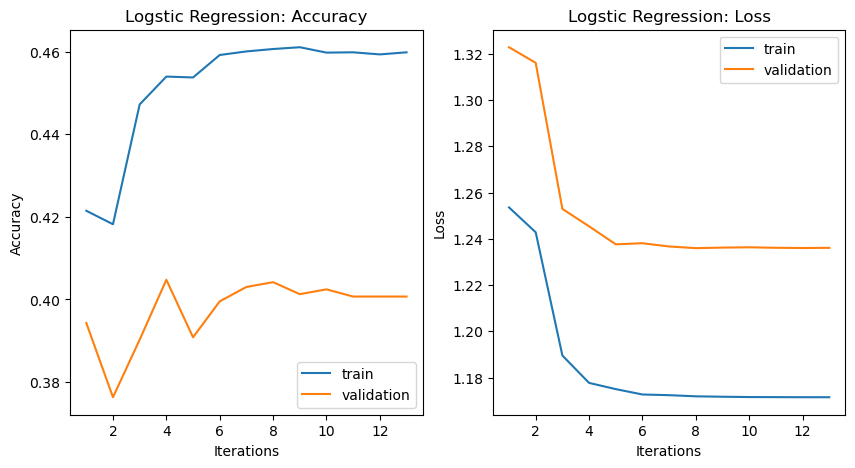

--- Validation Set Scores ---
Accuracy: 0.40069686411149824
Loss 1.236124218717698


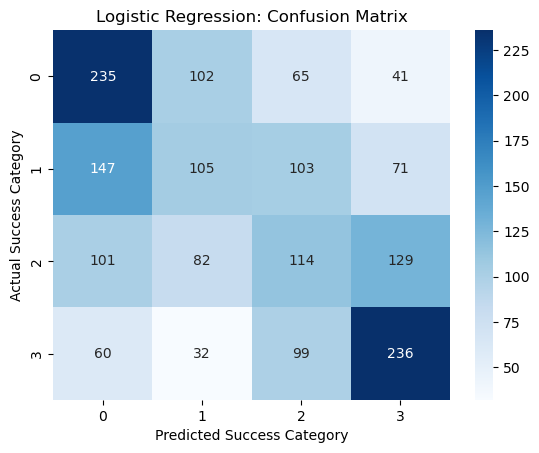

Classification Report:
              precision    recall  f1-score   support

         0.0       0.43      0.53      0.48       443
         1.0       0.33      0.25      0.28       426
         2.0       0.30      0.27      0.28       426
         3.0       0.49      0.55      0.52       427

    accuracy                           0.40      1722
   macro avg       0.39      0.40      0.39      1722
weighted avg       0.39      0.40      0.39      1722



/var/folders/58/jk9t7ygx41zcr6078k3w_g580000gn/T/ipykernel_17386/2804746553.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_record = pd.concat([performance_record, new_df], ignore_index=True)


In [25]:
# Logistic Regression

accuracy_train_list = []
accuracy_val_list = []
loss_train_list = []
loss_val_list = []
iteration_list = []

lowest_loss = np.inf
consecutive_loss_fall = 0
for i in range(1, 1000):
    lr_model = LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=i,
        warm_start=True, # to keep previous coefficients
        random_state=0
    )

    lr_model.fit(X_train, y_train)

    y_hat_train = lr_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_train_list.append(accuracy_train)
    y_proba_train = lr_model.predict_proba(X_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_train_list.append(loss_train)

    y_hat_val = lr_model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_hat_val)
    accuracy_val_list.append(accuracy_val)
    y_proba_val = lr_model.predict_proba(X_val)
    loss_val = log_loss(y_val, y_proba_val)
    loss_val_list.append(loss_val)

    iteration_list.append(i)

    if loss_val < lowest_loss:
        lowest_loss = loss_val
        consecutive_loss_fall = 0
    else:
        consecutive_loss_fall += 1
    
    if consecutive_loss_fall == 5:
        print(f"Early stopping activated - iteration {i}")
        break
    else:
        continue

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(iteration_list, accuracy_train_list, label="train")
plt.plot(iteration_list, accuracy_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logstic Regression: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(iteration_list, loss_train_list, label="train")
plt.plot(iteration_list, loss_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logstic Regression: Loss")
plt.legend()

plt.show()

y_hat_val = lr_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
y_proba_val = lr_model.predict_proba(X_val)
loss_val = log_loss(y_val, y_proba_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}\nLoss {loss_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

print(f"Classification Report:\n{classification_report(y_val, y_hat_val)}")

cat_4_performance_record = add_to_cat_4_record(
    cat_4_performance_record,
    'lr_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

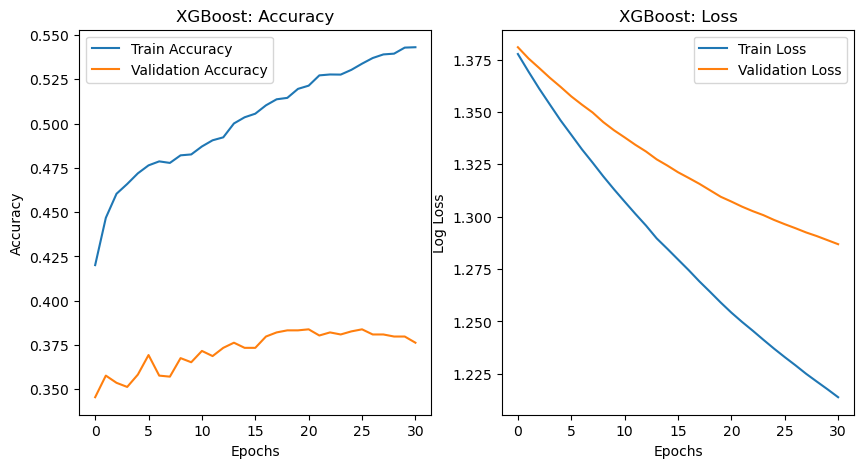

--- Validation Set Scores ---
Accuracy: 0.37630662020905925


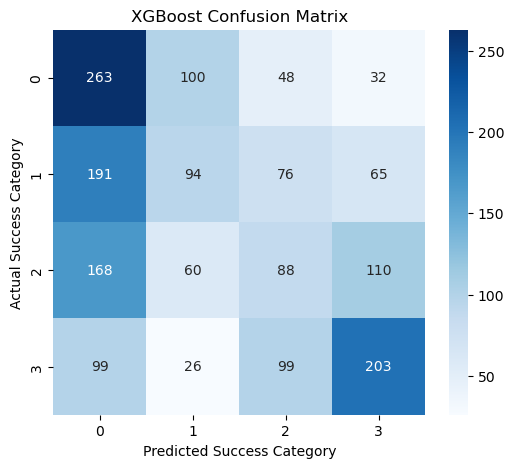

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.36      0.59      0.45       443
         1.0       0.34      0.22      0.27       426
         2.0       0.28      0.21      0.24       426
         3.0       0.50      0.48      0.49       427

    accuracy                           0.38      1722
   macro avg       0.37      0.37      0.36      1722
weighted avg       0.37      0.38      0.36      1722



In [26]:
# XGB Classification

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_val, label=y_val)
dm_test = xgb.DMatrix(X_test, label=y_test)

model_parameters = {
    "objective": "multi:softmax",
    "num_class": 4,
    "eval_metric": ["mlogloss", "merror"],
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

evals_result = {} # store training history

xgbc_model = xgb.train(
    model_parameters,
    dm_train,
    num_boost_round=100,
    evals=[(dm_train, "train"), (dm_val, "val")],
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = False
)

num_epochs = len(evals_result["train"]["mlogloss"])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(num_epochs), 1 - np.array(evals_result["train"]["merror"]), label="Train Accuracy")
plt.plot(range(num_epochs), 1 - np.array(evals_result["val"]["merror"]), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("XGBoost: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs), evals_result["train"]["mlogloss"], label="Train Loss")
plt.plot(range(num_epochs), evals_result["val"]["mlogloss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("XGBoost: Loss")
plt.legend()

plt.show()

y_hat_val = xgbc_model.predict(dm_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("XGBoost Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_4_performance_record = add_to_cat_4_record(
    cat_4_performance_record,
    'xgbc_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

In [27]:
cat_4_performance_record

,model,accuracy,f1_weighted,precision_0,precision_1,precision_2,precision_3,recall_0,recall_1,recall_2,recall_3,f1_0,f1_1,f1_2,f1_3
0,lr_model,0.400697,0.391538,0.432781,0.327103,0.299213,0.494759,0.530474,0.246479,0.267606,0.552693,0.476673,0.281124,0.282528,0.522124
1,xgbc_model,0.376307,0.361487,0.364771,0.335714,0.282958,0.495122,0.593679,0.220657,0.206573,0.475410,0.451890,0.266289,0.238806,0.485066


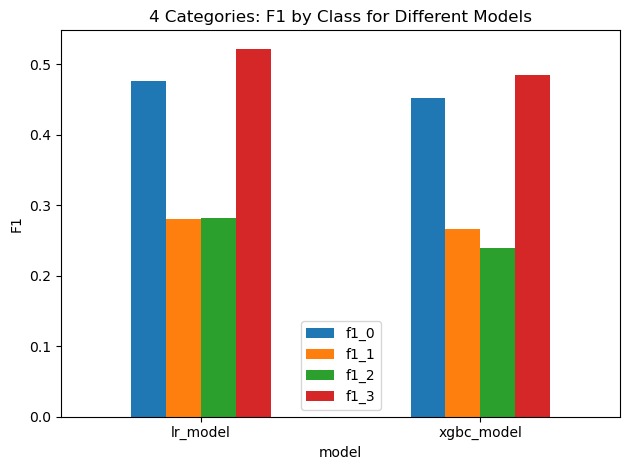

In [28]:
cat_4_performance_record.set_index('model')[['f1_0', 'f1_1', 'f1_2', 'f1_3']].plot(kind='bar')
plt.ylabel("F1")
plt.title("4 Categories: F1 by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

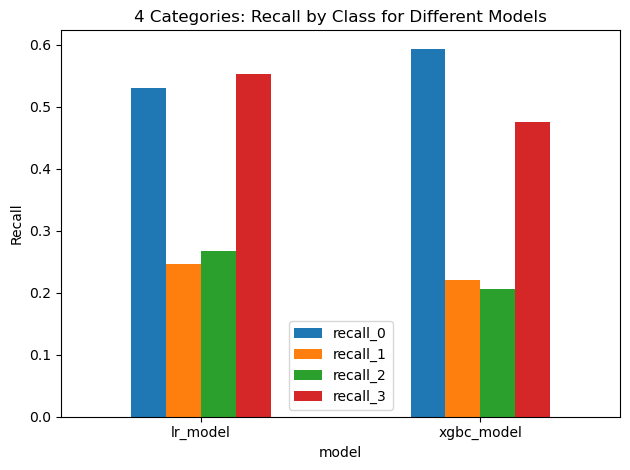

In [29]:
cat_4_performance_record.set_index('model')[['recall_0', 'recall_1', 'recall_2', 'recall_3']].plot(kind='bar')
plt.ylabel("Recall")
plt.title("4 Categories: Recall by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

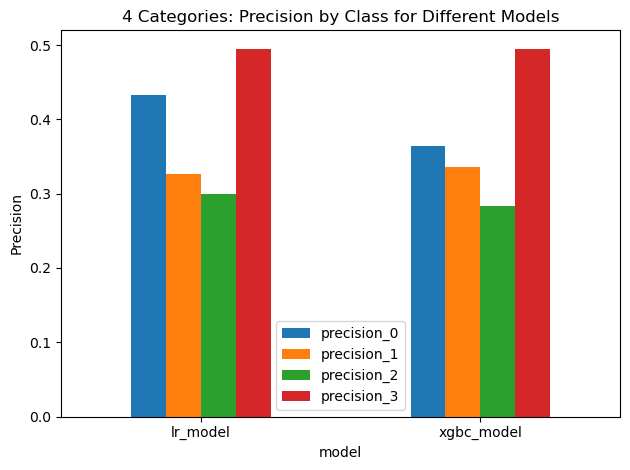

In [30]:
cat_4_performance_record.set_index('model')[['precision_0', 'precision_1', 'precision_2', 'precision_3']].plot(kind='bar')
plt.ylabel("Precision")
plt.title("4 Categories: Precision by Class for Different Models")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

Our classifiers are generally poor with differentiating middle categories from the extreme top and bottom categories.

It might be easier if we split the data into only three categories - zero ratings, normal success and higher success.

# Classification - Three Categories

In [11]:
def add_to_cat_3_record(performance_record: pd.DataFrame, model_name: str, report, accuracy) -> pd.DataFrame:
    if model_name in performance_record['model'].values:
        return performance_record
    
    new_row = {
        'model': model_name,
        'accuracy': accuracy,
        'f1_weighted': report['weighted avg']['f1-score'],
        'precision_0': report['0.0']['precision'],
        'precision_1': report['1.0']['precision'],
        'precision_2': report['2.0']['precision'],
        'recall_0': report['0.0']['recall'],
        'recall_1': report['1.0']['recall'],
        'recall_2': report['2.0']['recall'],
        'f1_0': report['0.0']['f1-score'],
        'f1_1': report['1.0']['f1-score'],
        'f1_2': report['2.0']['f1-score']
    }

    new_df = pd.DataFrame([new_row])
    performance_record = pd.concat([performance_record, new_df], ignore_index=True)
    return performance_record

In [12]:
df_cat_3 = pd.read_csv('../data/preprocessed_games_cat_3.csv')

cat_3_performance_record = pd.DataFrame(columns=['model','accuracy','f1_weighted', 'precision_0', 'precision_1', 'precision_2', 'recall_0', 'recall_1', 'recall_2', 'f1_0', 'f1_1', 'f1_2'])

df_cat_3

,id,2d,3d,ability,able,access,account,achievement,achievements,action,...,way,weapon,whole,work,world,www,year,young,zombie,success_class
0,3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077217,0.000000,...,0.000000,0.000000,0.0,0.000000,0.159854,0.0,0.000000,0.0,0.0,2.0
1,3328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.170055,...,0.000000,0.000000,0.0,0.147969,0.335459,0.0,0.000000,0.0,0.0,2.0
2,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042543,0.000000,...,0.056385,0.063615,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.0
3,4291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069849,0.000000,...,0.000000,0.313342,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,2.0
4,5286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333835,...,0.000000,0.095134,0.0,0.000000,0.065854,0.0,0.000000,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,320395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0
17221,311674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070975,0.000000,...,0.000000,0.000000,0.0,0.000000,0.073466,0.0,0.000000,0.0,0.0,0.0
17222,290056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070597,0.000000,...,0.093567,0.000000,0.0,0.000000,0.073074,0.0,0.000000,0.0,0.0,0.0
17223,268298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.173640,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0


In [13]:
print(df_cat_3['success_class'].value_counts().sort_index())

success_class
0.0    4428
1.0    6399
2.0    6398
Name: count, dtype: int64


In [14]:
X = df_cat_3.iloc[:,1:-1]
y = df_cat_3.iloc[:,-1]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

print(f'Train size: {len(X_train)}\nValidation size: {len(X_val)}\nTest size: {len(X_test)}')

print(f'Train distribution: {y_train.value_counts().sort_index()}')
print(f'Validation distribution: {y_val.value_counts().sort_index()}')
print(f'Test distribution: {y_val.value_counts().sort_index()}')

Train size: 13780
Validation size: 1722
Test size: 1723
Train distribution: success_class
0.0    3542
1.0    5119
2.0    5119
Name: count, dtype: int64
Validation distribution: success_class
0.0    443
1.0    640
2.0    639
Name: count, dtype: int64
Test distribution: success_class
0.0    443
1.0    640
2.0    639
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model

Early stopping activated - iteration 12


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


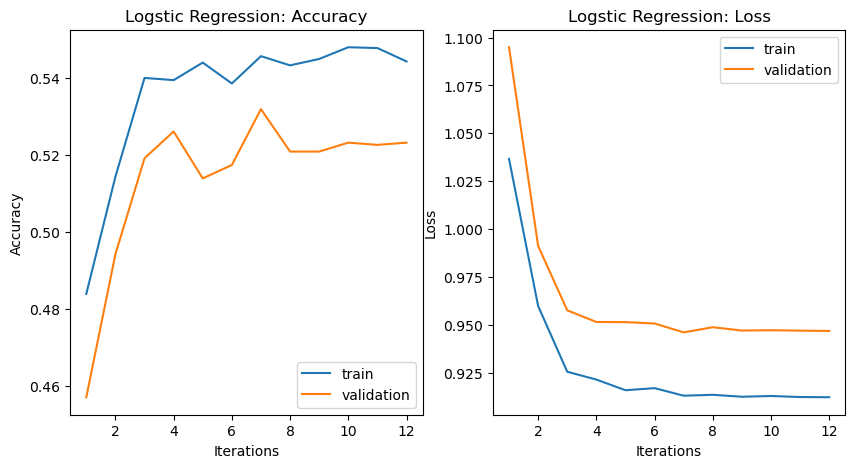

--- Validation Set Scores ---
Accuracy: 0.5232288037166086
Loss 0.9467769762834661


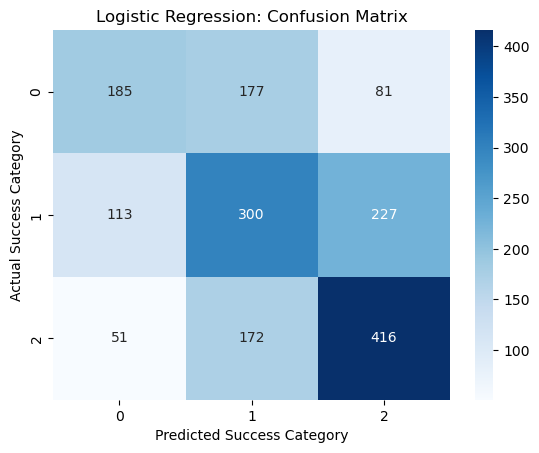

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      0.42      0.47       443
         1.0       0.46      0.47      0.47       640
         2.0       0.57      0.65      0.61       639

    accuracy                           0.52      1722
   macro avg       0.52      0.51      0.51      1722
weighted avg       0.52      0.52      0.52      1722



/var/folders/58/jk9t7ygx41zcr6078k3w_g580000gn/T/ipykernel_18843/1386029636.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_record = pd.concat([performance_record, new_df], ignore_index=True)


In [15]:
# Logistic Regression

accuracy_train_list = []
accuracy_val_list = []
loss_train_list = []
loss_val_list = []
iteration_list = []

lowest_loss = np.inf
consecutive_loss_fall = 0
for i in range(1, 1000):
    lr_model_2 = LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        max_iter=i,
        warm_start=True, # to keep previous coefficients
        random_state=0
    )

    lr_model_2.fit(X_train, y_train)

    y_hat_train = lr_model_2.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_hat_train)
    accuracy_train_list.append(accuracy_train)
    y_proba_train = lr_model_2.predict_proba(X_train)
    loss_train = log_loss(y_train, y_proba_train)
    loss_train_list.append(loss_train)

    y_hat_val = lr_model_2.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_hat_val)
    accuracy_val_list.append(accuracy_val)
    y_proba_val = lr_model_2.predict_proba(X_val)
    loss_val = log_loss(y_val, y_proba_val)
    loss_val_list.append(loss_val)

    iteration_list.append(i)

    if loss_val < lowest_loss:
        lowest_loss = loss_val
        consecutive_loss_fall = 0
    else:
        consecutive_loss_fall += 1
    
    if consecutive_loss_fall == 5:
        print(f"Early stopping activated - iteration {i}")
        break
    else:
        continue

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(iteration_list, accuracy_train_list, label="train")
plt.plot(iteration_list, accuracy_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Logstic Regression: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(iteration_list, loss_train_list, label="train")
plt.plot(iteration_list, loss_val_list, label="validation")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logstic Regression: Loss")
plt.legend()

plt.show()

y_hat_val = lr_model_2.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
y_proba_val = lr_model_2.predict_proba(X_val)
loss_val = log_loss(y_val, y_proba_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}\nLoss {loss_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Logistic Regression: Confusion Matrix")
plt.show()

print(f"Classification Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'lr_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

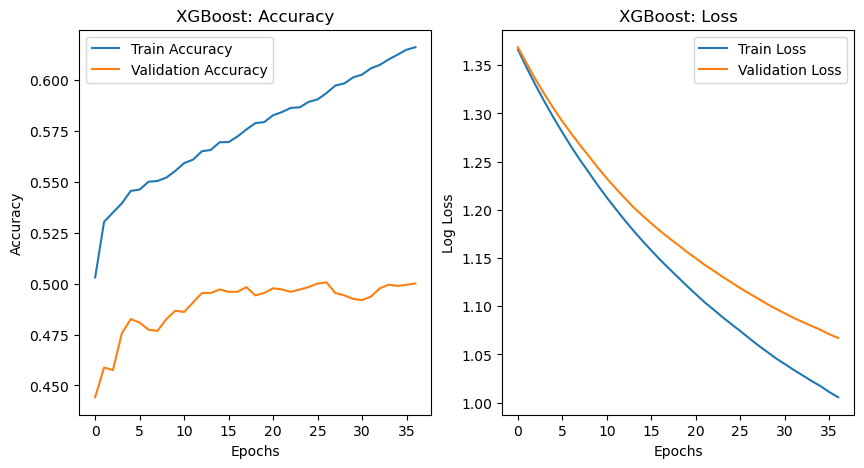

--- Validation Set Scores ---
Accuracy: 0.5


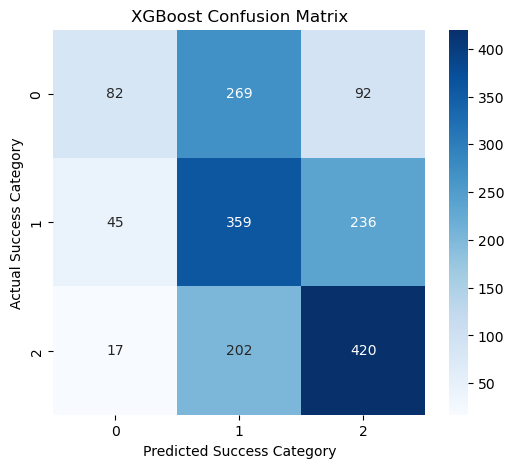

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.57      0.19      0.28       443
         1.0       0.43      0.56      0.49       640
         2.0       0.56      0.66      0.61       639

    accuracy                           0.50      1722
   macro avg       0.52      0.47      0.46      1722
weighted avg       0.52      0.50      0.48      1722



In [16]:
# XGB Classification

dm_train = xgb.DMatrix(X_train, label=y_train)
dm_val = xgb.DMatrix(X_val, label=y_val)
dm_test = xgb.DMatrix(X_test, label=y_test)

model_parameters = {
    "objective": "multi:softmax",
    "num_class": 4,
    "eval_metric": ["mlogloss", "merror"],
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

evals_result = {} # store training history

xgbc_model_2 = xgb.train(
    model_parameters,
    dm_train,
    num_boost_round=100,
    evals=[(dm_train, "train"), (dm_val, "val")],
    evals_result = evals_result,
    early_stopping_rounds = 10,
    verbose_eval = False
)

num_epochs = len(evals_result["train"]["mlogloss"])

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(range(num_epochs), 1 - np.array(evals_result["train"]["merror"]), label="Train Accuracy")
plt.plot(range(num_epochs), 1 - np.array(evals_result["val"]["merror"]), label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("XGBoost: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs), evals_result["train"]["mlogloss"], label="Train Loss")
plt.plot(range(num_epochs), evals_result["val"]["mlogloss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("XGBoost: Loss")
plt.legend()

plt.show()

y_hat_val = xgbc_model_2.predict(dm_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("XGBoost Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'xgbc_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

--- Validation Set Scores ---
Accuracy: 0.47444831591173053


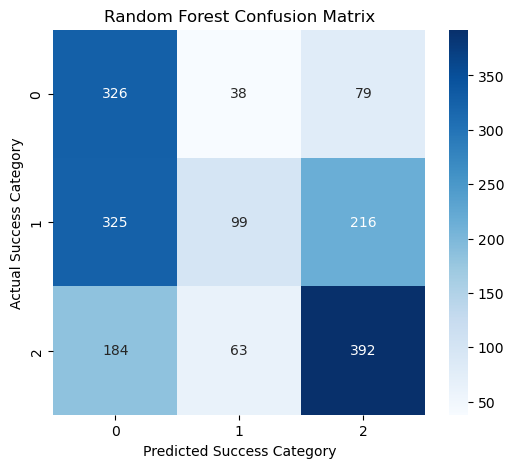

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.39      0.74      0.51       443
         1.0       0.49      0.15      0.24       640
         2.0       0.57      0.61      0.59       639

    accuracy                           0.47      1722
   macro avg       0.49      0.50      0.45      1722
weighted avg       0.50      0.47      0.44      1722



In [17]:
# Random Forest Classification

rfc_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=0,
    n_jobs=-1,
    class_weight='balanced'
)

rfc_model.fit(X_train, y_train)

y_hat_val = rfc_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_hat_val)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Random Forest Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'rfc_model',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.4340 - loss: 1.0454 - val_accuracy: 0.5023 - val_loss: 0.9558
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.5124 - loss: 0.9428 - val_accuracy: 0.5186 - val_loss: 0.9403
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.5363 - loss: 0.9147 - val_accuracy: 0.5267 - val_loss: 0.9297
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.5510 - loss: 0.8938 - val_accuracy: 0.5343 - val_loss: 0.9289
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.5674 - loss: 0.8821 - val_accuracy: 0.5343 - val_loss: 0.9241
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.5944 - loss: 0.8553 - val_accuracy: 0.5285 - val_loss: 0.9262
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - accuracy: 0.6071 - loss: 0.8411 - val_accuracy: 0.5267 - val_loss: 0.9363
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.6271 - loss: 0.8028 - val_accurac

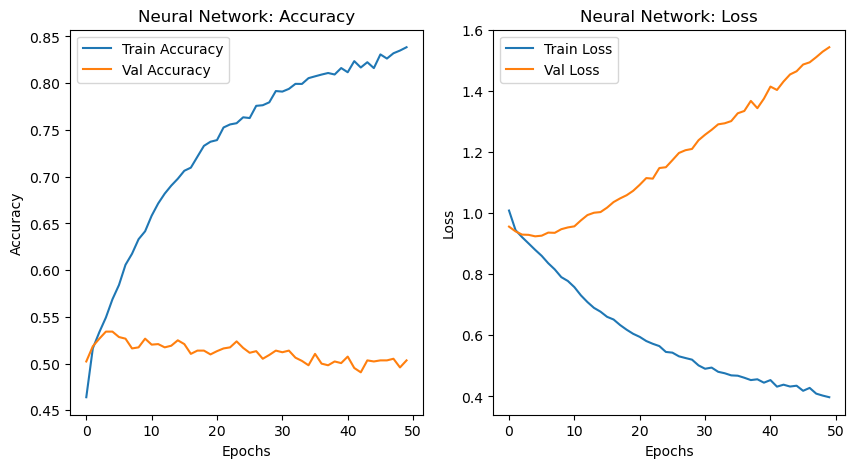

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.4895 - loss: 1.5988
--- Validation Set Scores ---
Accuracy: 0.503484308719635
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


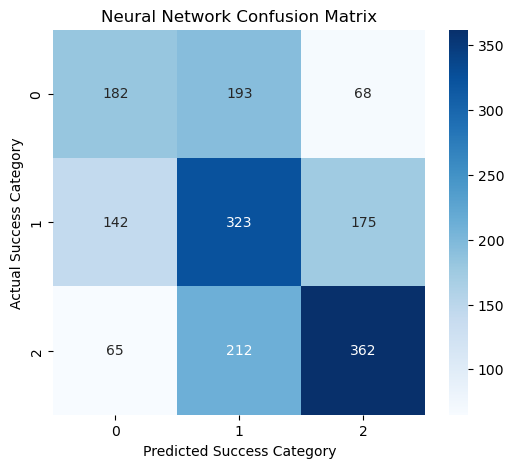

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.47      0.41      0.44       443
         1.0       0.44      0.50      0.47       640
         2.0       0.60      0.57      0.58       639

    accuracy                           0.50      1722
   macro avg       0.50      0.49      0.50      1722
weighted avg       0.51      0.50      0.50      1722



In [18]:
# Neural Network Classification

y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

nn_model_2 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

nn_model_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_2.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_2.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_2.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_2',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3978 - loss: 1.2074 - val_accuracy: 0.4843 - val_loss: 1.0090
Epoch 2/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4880 - loss: 0.9809 - val_accuracy: 0.5081 - val_loss: 0.9547
Epoch 3/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.5231 - loss: 0.9319 - val_accuracy: 0.5081 - val_loss: 0.9470
Epoch 4/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5472 - loss: 0.9104 - val_accuracy: 0.5087 - val_loss: 0.9460
Epoch 5/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.5581 - loss: 0.8905 - val_accuracy: 0.5064 - val_loss: 0.9417
Epoch 6/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5789 - loss: 0.8587 - val_accuracy: 0.5221 - val_loss: 0.9458
Epoch 7/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.5985 - loss: 0.8374 - val_accuracy: 0.5058 - val_loss: 0.9500
Epoch 8/50
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6129 - loss: 0.8153 - val_accuracy: 0.5134 

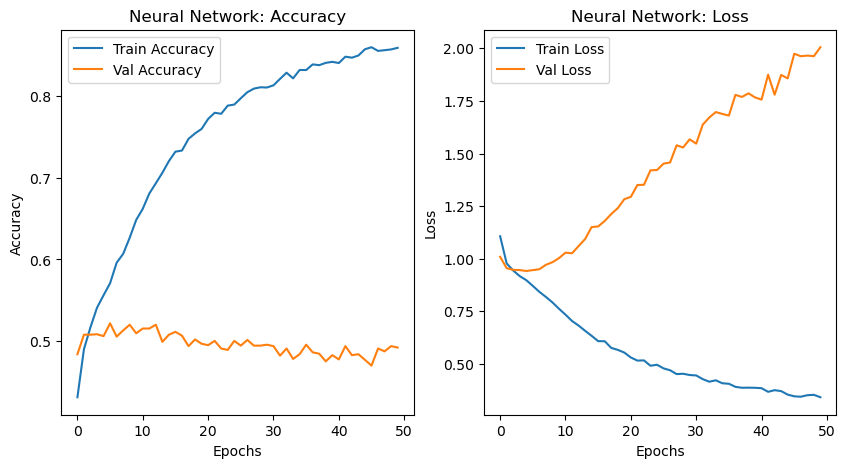

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.4800 - loss: 2.1158
--- Validation Set Scores ---
Accuracy: 0.49245062470436096
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


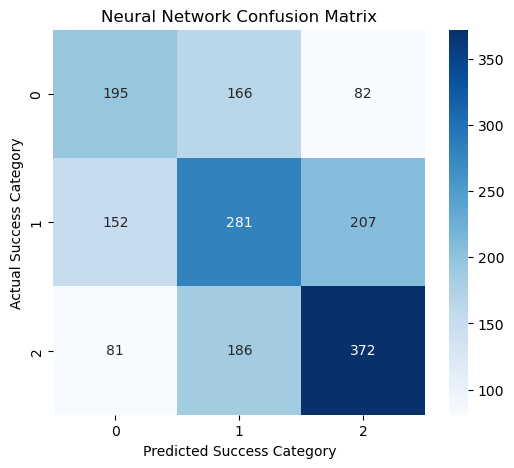

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.46      0.44      0.45       443
         1.0       0.44      0.44      0.44       640
         2.0       0.56      0.58      0.57       639

    accuracy                           0.49      1722
   macro avg       0.49      0.49      0.49      1722
weighted avg       0.49      0.49      0.49      1722



In [19]:
# increased layer size, added extra dropout, added batch normalization

nn_model_3 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

nn_model_3.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_3.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=50,
    batch_size=32,
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_3.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_3.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_3',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4019 - loss: 1.2438 - val_accuracy: 0.4628 - val_loss: 1.0169 - learning_rate: 0.0010
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4913 - loss: 0.9753 - val_accuracy: 0.5058 - val_loss: 0.9564 - learning_rate: 0.0010
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5287 - loss: 0.9386 - val_accuracy: 0.5087 - val_loss: 0.9507 - learning_rate: 0.0010
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5422 - loss: 0.9154 - val_accuracy: 0.5151 - val_loss: 0.9372 - learning_rate: 0.0010
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5630 - loss: 0.8896 - val_accuracy: 0.5151 - val_loss: 0.9481 - learning_rate: 0.0010
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5855 - loss: 0.8604 - val_accuracy: 0.5163 - val_loss: 0.9452 - learning_rate: 0.0010
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5990 - loss: 0.8386 - val_a

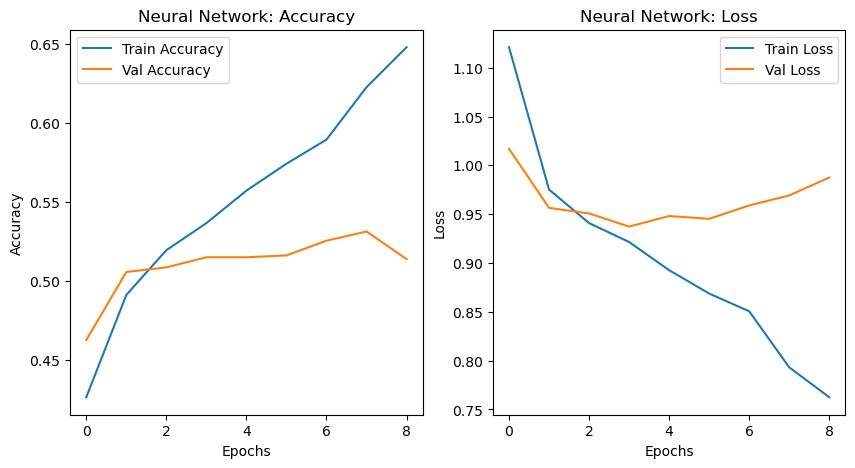

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5044 - loss: 0.9447
--- Validation Set Scores ---
Accuracy: 0.5150987505912781
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


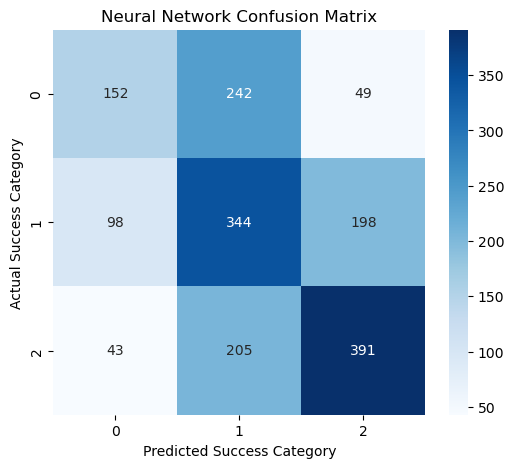

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.52      0.34      0.41       443
         1.0       0.43      0.54      0.48       640
         2.0       0.61      0.61      0.61       639

    accuracy                           0.52      1722
   macro avg       0.52      0.50      0.50      1722
weighted avg       0.52      0.52      0.51      1722



In [20]:
# implemented early stopping and reducelronplateau
# also added class weighting

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

class_weights = dict(zip(
    np.unique(y_train),
    compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))

nn_model_4 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

nn_model_4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_4.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_4.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_4.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_4',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4296 - loss: 1.1518 - val_accuracy: 0.4564 - val_loss: 1.0046 - learning_rate: 0.0010
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5073 - loss: 0.9644 - val_accuracy: 0.5046 - val_loss: 0.9578 - learning_rate: 0.0010
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5339 - loss: 0.9292 - val_accuracy: 0.5145 - val_loss: 0.9400 - learning_rate: 0.0010
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5568 - loss: 0.9025 - val_accuracy: 0.5238 - val_loss: 0.9371 - learning_rate: 0.0010
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5668 - loss: 0.8834 - val_accuracy: 0.5267 - val_loss: 0.9451 - learning_rate: 0.0010
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5768 - loss: 0.8754 - val_accuracy: 0.5250 - val_loss: 0.9517 - learning_rate: 0.0010
Epoch 7/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5897 - loss: 0.8567 - val_a

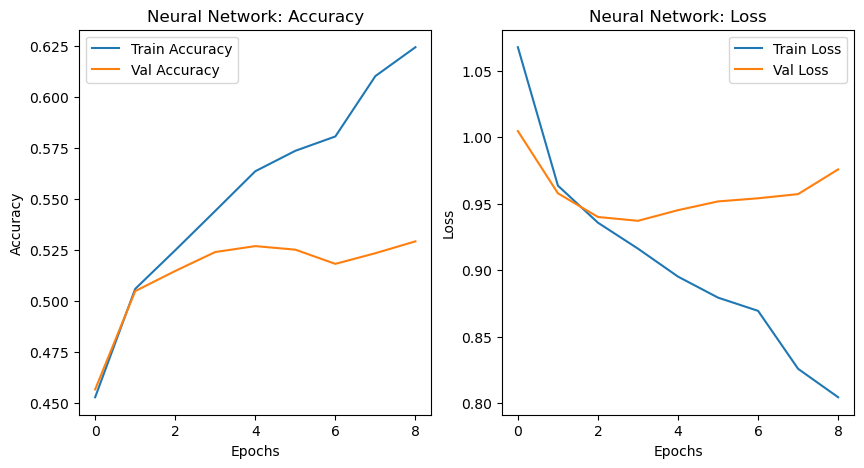

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.5081 - loss: 0.9535
--- Validation Set Scores ---
Accuracy: 0.523809552192688
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


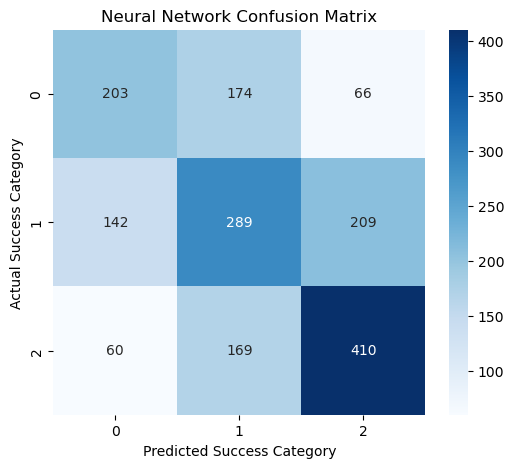

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.50      0.46      0.48       443
         1.0       0.46      0.45      0.45       640
         2.0       0.60      0.64      0.62       639

    accuracy                           0.52      1722
   macro avg       0.52      0.52      0.52      1722
weighted avg       0.52      0.52      0.52      1722



In [21]:
# added leakyrelu and increased model depth

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

class_weights = dict(zip(
    np.unique(y_train),
    compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
))

nn_model_5 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],)),
    LeakyReLU(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128),
    LeakyReLU(),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(),
    Dense(3, activation='softmax')
])

nn_model_5.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model_5.fit(
    X_train, y_train_cat,
    validation_data = (X_val, y_val_cat),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Neural Network: Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural Network: Loss")
plt.legend()

plt.show()

loss_val, accuracy_val = nn_model_5.evaluate(X_val, y_val_cat)
print(f"--- Validation Set Scores ---\nAccuracy: {accuracy_val}")

y_hat_val_probs = nn_model_5.predict(X_val)
y_hat_val = y_hat_val_probs.argmax(axis=1)

val_matrix = confusion_matrix(y_val, y_hat_val)
plt.figure(figsize=(6,5))
sns.heatmap(val_matrix, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted Success Category")
plt.ylabel("Actual Success Category")
plt.title("Neural Network Confusion Matrix")
plt.show()

print(f"Classfication Report:\n{classification_report(y_val, y_hat_val)}")

cat_3_performance_record = add_to_cat_3_record(
    cat_3_performance_record,
    'nn_model_5',
    classification_report(y_val, y_hat_val, output_dict=True),
    accuracy_val
)

In [22]:
cat_3_performance_record

,model,accuracy,f1_weighted,precision_0,precision_1,precision_2,recall_0,recall_1,recall_2,f1_0,f1_1,f1_2
0,lr_model_2,0.523229,0.519698,0.530086,0.462250,0.574586,0.417607,0.468750,0.651017,0.467172,0.465477,0.610418
1,xgbc_model_2,0.500000,0.478142,0.569444,0.432530,0.561497,0.185102,0.560937,0.657277,0.279387,0.488435,0.605624
2,rfc_model,0.474448,0.438254,0.390419,0.495000,0.570597,0.735892,0.154688,0.613459,0.510172,0.235714,0.591252
3,nn_model_2,0.503484,0.504024,0.467866,0.443681,0.598347,0.410835,0.504687,0.566510,0.437500,0.472222,0.581994
4,nn_model_3,0.492451,0.491642,0.455607,0.443918,0.562784,0.440181,0.439063,0.582160,0.447761,0.441477,0.572308
5,nn_model_4,0.515099,0.512187,0.518771,0.434893,0.612853,0.343115,0.537500,0.611894,0.413043,0.480783,0.612373
6,nn_model_5,0.523810,0.521875,0.501235,0.457278,0.598540,0.458239,0.451562,0.641628,0.478774,0.454403,0.619335


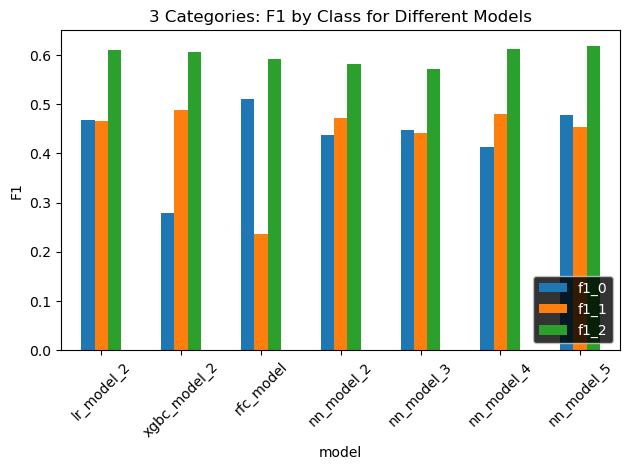

In [23]:
cat_3_performance_record.set_index('model')[['f1_0', 'f1_1', 'f1_2']].plot(kind='bar')
plt.ylabel("F1")
plt.title("3 Categories: F1 by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

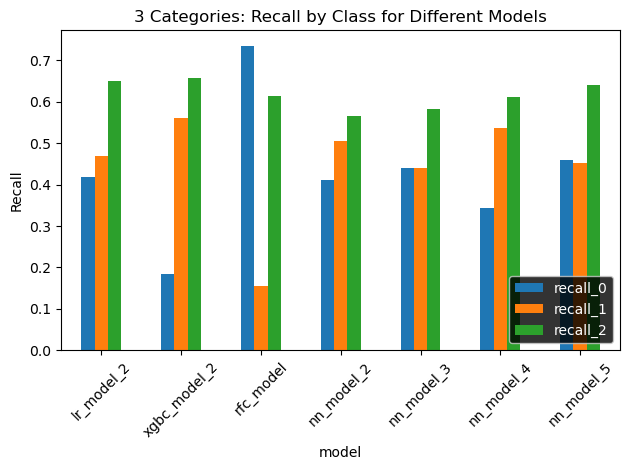

In [24]:
cat_3_performance_record.set_index('model')[['recall_0', 'recall_1', 'recall_2']].plot(kind='bar')
plt.ylabel("Recall")
plt.title("3 Categories: Recall by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

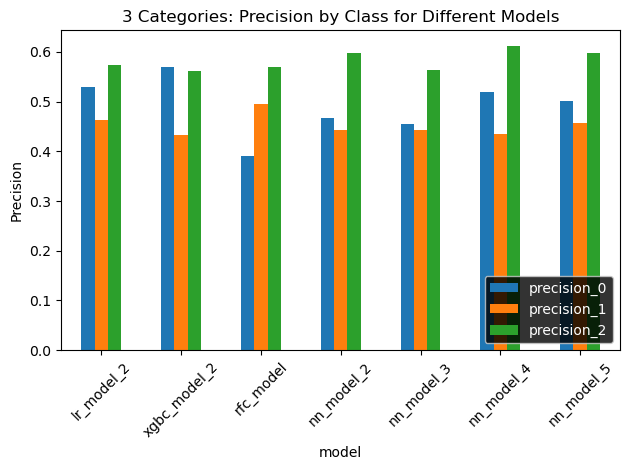

In [25]:
cat_3_performance_record.set_index('model')[['precision_0', 'precision_1', 'precision_2']].plot(kind='bar')
plt.ylabel("Precision")
plt.title("3 Categories: Precision by Class for Different Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', facecolor='black', labelcolor = 'white')
plt.tight_layout()
plt.show()

We will use nn_model_5 for the basis of the recommender, as it is fairly good at predicting classes 0 and 2. We'll work with softmax probabilities.

# Recommender System

In [26]:
X_pool, X_holdout, y_pool, y_holdout = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

y_pool_cat = to_categorical(y_pool, num_classes=3)

In [27]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

In [28]:
inputs = Input(shape=(X_pool.shape[1],))
x = Dense(256)(inputs)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64)(x)
x = LeakyReLU()(x)

outputs = Dense(3, activation='softmax')(x)

model_func = Model(inputs=inputs, outputs=outputs)

model_func.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model_func.fit(
    X_pool, y_pool_cat,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)

embedding_model = Model(inputs=model_func.input, outputs=model_func.layers[-2].output)
embeddings = embedding_model.predict(X_pool)
softmax_outputs = model_func.predict(X_pool)

Epoch 1/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4292 - loss: 1.1604 - val_accuracy: 0.5048 - val_loss: 0.9809 - learning_rate: 0.0010
Epoch 2/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5046 - loss: 0.9650 - val_accuracy: 0.5074 - val_loss: 0.9467 - learning_rate: 0.0010
Epoch 3/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5339 - loss: 0.9305 - val_accuracy: 0.5126 - val_loss: 0.9427 - learning_rate: 0.0010
Epoch 4/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5494 - loss: 0.9066 - val_accuracy: 0.5229 - val_loss: 0.9439 - learning_rate: 0.0010
Epoch 5/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5560 - loss: 0.8927 - val_accuracy: 0.5119 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 6/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5733 - loss: 0.8716 - val_accuracy: 0.5280 - val_loss: 0.9393 - learning_rate: 0.0010
Epoch 7/100
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5871 - loss: 0.

In [29]:
'''
np.save('../data/softmax_outputs.npy', softmax_outputs)
np.save('../data/embeddings.npy', embeddings)

df_meta = df_cat_3.loc[X_pool.index]
df_meta.to_csv('../data/pool_metadata.csv', index=False)
'''

"\nnp.save('../data/softmax_outputs.npy', softmax_outputs)\nnp.save('../data/embeddings.npy', embeddings)\n\ndf_meta = df_cat_3.loc[X_pool.index]\ndf_meta.to_csv('../data/pool_metadata.csv', index=False)\n"

In [30]:
embeddings

array([[ 2.0523443 ,  0.15512118, -0.15374538, ..., -0.06902014,
        -0.26951447, -0.06841037],
       [-0.2518636 , -0.48283854,  1.081618  , ...,  0.7538474 ,
         0.7568082 , -0.18997104],
       [-0.02815747,  0.3500474 , -0.16420823, ..., -0.01241149,
         1.0446062 , -0.35769796],
       ...,
       [ 0.9438782 , -0.47231212, -0.6235583 , ..., -0.05690151,
        -0.18345323, -0.02688609],
       [-0.086799  , -0.00590802,  0.68128705, ..., -0.56531197,
        -0.24485248,  0.9975143 ],
       [-1.2799394 ,  0.8129629 , -0.5698875 , ..., -0.1502569 ,
        -0.05594519, -0.30965847]], dtype=float32)

In [31]:
success_scores = np.dot(softmax_outputs, np.array([0, 1, 2]))

tag_popularity = np.sum(X_pool, axis=0)

In [32]:
tag_popularity

2d         363.919259
3d         143.846352
ability    321.478364
able       162.344827
access     234.558383
              ...    
world      922.628606
www        128.226714
year       289.057710
young      144.961996
zombie     129.405718
Length: 300, dtype: float64

In [33]:
from sklearn.neighbors import NearestNeighbors

In [34]:
knn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
knn_model.fit(embeddings)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [ ]:
def recommend_tags(user_vector, embedding_model, embeddings, X_pool, all_tags, success_scores, tag_popularity, knn_model, top_k=5):
    import pandas as pd
    import numpy as np

    # get user embedding
    user_embedding = embedding_model.predict(user_vector.reshape(1, -1), verbose=0)

    # find similar ideas
    distances, indices = knn_model.kneighbors(user_embedding, n_neighbors=50)
    indices = indices[0]

    # get user success score
    user_score = np.dot(softmax_outputs[indices[0]], [0, 1, 2])

    # ensure tag_popularity is a numpy array aligned to all_tags
    if isinstance(tag_popularity, pd.Series):
        tag_popularity_vector = np.array([tag_popularity.get(tag, 0) for tag in all_tags])
    else:
        tag_popularity_vector = tag_popularity

    user_popularity_score = np.dot(user_vector, tag_popularity_vector) / (np.sum(user_vector) + 1e-6)

    # filter for better + niche ideas
    better_indices = []
    for idx in indices:
        idea_vector = X_pool.iloc[idx]
        idea_score = np.dot(softmax_outputs[idx], [0, 1, 2])
        idea_popularity_score = np.dot(idea_vector, tag_popularity_vector) / (np.sum(idea_vector) + 1e-6)
        if idea_score > user_score and idea_popularity_score < user_popularity_score:
            better_indices.append(idx)

    if not better_indices:
        return []

    # aggregate tag suggestions
    suggested_tags = np.zeros(X_pool.shape[1])
    for idx in better_indices:
        tag_diff = X_pool.iloc[idx] - user_vector  # tags they have that user lacks
        tag_diff = np.clip(tag_diff, 0, 1)
        suggested_tags += tag_diff

    # recommend top tags
    recommended_tag_indices = np.argsort(suggested_tags)[::-1][:top_k]
    return [all_tags[i] for i in recommended_tag_indices]


In [ ]:
def tags_to_vector(user_tags, all_tags):
    vector = np.zeros(len(all_tags))
    for tag in user_tags:
        if tag in all_tags:
            vector[all_tags.index(tag)] = 1
    return vector

In [ ]:
user_tags = ['2d','city','world','horror']
all_tags = df_cat_3.columns.to_list()[1:-1]
user_vector = tags_to_vector(user_tags, all_tags)

recommend_tags(user_vector, embedding_model, embeddings, X_pool, all_tags, success_scores, tag_popularity, knn_model)

['survival', 'gore', 'puzzle', 'person', 'funny']

In [45]:
import pickle

In [47]:
with open('../src/data_utils/vectoriser.pkl', 'rb') as f:
    vectoriser = pickle.load(f)

In [59]:
import re
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [ ]:
# reuse preprocessor functions to clean user input text

def strip_non_english(text: str) -> str:
    match = re.search(r'\n(?:Español|Deutsch|Français|Русский|中文|日本語|한국어)\b', text)
    if match:
        return text[:match.start()].strip()
    return text

def remove_non_english_words(text: str) -> str:
    if not isinstance(text, str):
        return ''
    words = text.split()
    english_words = [word for word in words if all(ord(c)<128 for c in word)]
    return ' '.join(english_words)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def clean_text(text: str) -> str:
    stop_words = set(stopwords.words('english'))
    lemmatiser = WordNetLemmatizer()

    text = strip_non_english(text)
    text = remove_non_english_words(text)
    tokens = word_tokenize(text)
    tags = pos_tag(tokens)

    cleaned = []
    for word, tag in tags:
        if word.lower() in stop_words:
            continue
        if tag in ['NNP', 'NNPS']:
            continue
        if not tag.startswith(('N', 'J')):
            continue
        tag = get_wordnet_pos(tag)
        if tag is None:
            continue
        lemma = lemmatiser.lemmatize(word.lower(), tag)
        cleaned.append(lemma)

    return ' '.join(cleaned)

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def user_description_to_tags(description: str, df, tfidf_array, vectoriser, all_tags, top_k=3):
    cleaned = clean_text(description)
    
    # tf-idf transform
    tfidf_vec = vectoriser.transform([cleaned]).toarray()
    
    # cosine similarity to all known games
    sims = cosine_similarity(tfidf_vec, tfidf_array)[0]
    
    # top K most similar games
    top_indices = sims.argsort()[-top_k:][::-1]
    
    # gather tags from those games
    tag_counts = Counter()
    for idx in top_indices:
        for tag in df.iloc[idx]['cleaned_tags']:
            if tag in all_tags:
                tag_counts[tag] += 1
    
    # return tag list sorted by frequency
    predicted_tags = [tag for tag, _ in tag_counts.most_common()]
    return predicted_tags


In [57]:
df_unvectorised = pd.read_csv('../data/unvectorised_preprocessed_games.csv')

tfidf_matrix = vectoriser.fit_transform(df_unvectorised['combined_text'])
tfidf_array = tfidf_matrix.toarray() # type: ignore

In [63]:
description = "A party city in a 2d world."
predicted_tags = user_description_to_tags(description, df_unvectorised, tfidf_array, vectoriser, all_tags)

predicted_tags

[]

In [65]:
input_vector = vectoriser.transform([clean_text(description)])
print("Nonzero entries in TF-IDF vector:", input_vector.nnz)


Nonzero entries in TF-IDF vector: 3


Currently looks like we have too few tags - go back to preprocessor, up the number of tags, and train all models again